## Lepton inside AK8

survived jet:  258
cleand jet:  240
total jet:  498


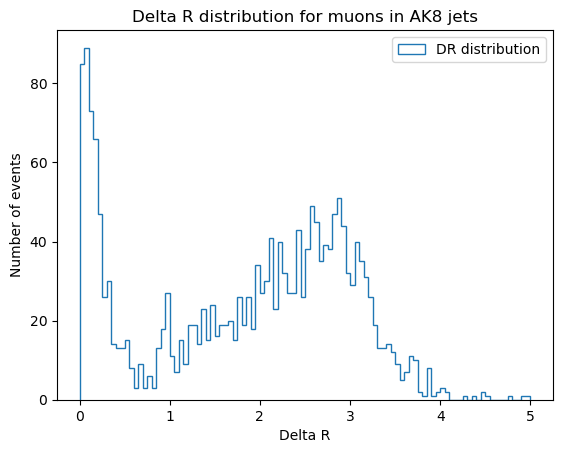

In [11]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

muon_pt = events["Muon_pt"].array()
muon_eta = events["Muon_eta"].array()
muon_phi = events["Muon_phi"].array()

#deltar
dr_total = []

min_idx = []
second_min_idx = []
third_min_idx = []
survived_jet = 0 
cleand_jet = 0

for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
        continue
    # fatjet
    top_etas = top_eta[i][1]
    top_phi = top_phi1[i][1]
    
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산
    dr_jet = np.sqrt(delta_eta**2 + delta_phi**2)
    if len(dr_jet) >1:
        idx = np.argsort(dr_jet)[0] #top AK8 jet index
        ## muon 중에 ak8 jet 과 R < 0.8 인 jet 갯수 찾기 
        ak8_eta = fatjet_eta[i][idx]
        ak8_phi = fatjet_phi[i][idx]

        muon_deta = muon_eta[i] - ak8_eta
        muon_dphi = muon_phi[i] - ak8_phi
        muon_dphi = (muon_dphi + np.pi) % (2 * np.pi) - np.pi
        muon_dr = np.sqrt(muon_deta**2 + muon_dphi**2)
        dr_total.append(muon_dr)
        muon_mask = muon_dr < 0.8
        muon_dr = muon_dr[muon_mask]
        #print("muon_dr: ", muon_dr)
        if len(muon_dr) > 0:
            cleand_jet += 1
        if len(muon_dr) == 0:
            survived_jet += 1

print ("survived jet: ", survived_jet)
print ("cleand jet: ", cleand_jet)
print ("total jet: ", survived_jet + cleand_jet)

dr_total = ak.flatten(dr_total)
plt.hist(dr_total, bins=100, range=(0, 5), histtype='step', label='DR distribution')
plt.xlabel('Delta R')
plt.ylabel('Number of events')
plt.title('Delta R distribution for muons in AK8 jets')
plt.legend()

        









## For all file

Processing ROOT files:   0%|          | 0/114 [00:00<?, ?it/s]

Processing ROOT files: 100%|██████████| 114/114 [13:51<00:00,  7.30s/it]


survived jet:  29172
cleand jet:  27551
total jet:  56723


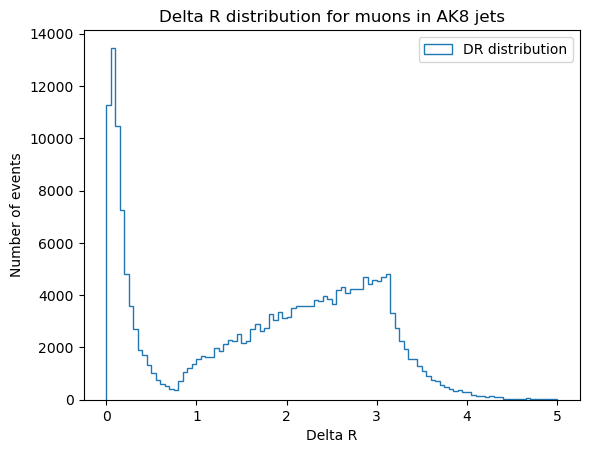

In [8]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm  # ✅ 진행률 표시

vector.register_awkward()

# 모든 .root 파일 경로 가져오기
path = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/"
file_list = sorted(glob.glob(path + "*.root"))

# 누적 리스트
def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)

dr_total_all = []

min_idx_all = []
second_min_idx_all = []
third_min_idx_all = []

survived_jet = 0 
cleand_jet = 0
# tqdm으로 파일 리스트 순회
for sample in tqdm(file_list, desc="Processing ROOT files"):
    file = uproot.open(sample)
    events = file["Events"]




    ## gen part 관련 정보
    gen_pdgid = events["GenPart_pdgId"].array()
    gen_pt = events["GenPart_pt"].array()
    gen_eta = events["GenPart_eta"].array()
    gen_phi = events["GenPart_phi"].array()

    topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
    top_eta = gen_eta[topmask]
    top_phi1 = gen_phi[topmask]

    ## Fatjet 
    fatjet_pt = events["FatJet_pt"].array()
    fatjet_eta = events["FatJet_eta"].array()
    fatjet_phi = events["FatJet_phi"].array()

    muon_pt = events["Muon_pt"].array()
    muon_eta = events["Muon_eta"].array()
    muon_phi = events["Muon_phi"].array()


    #deltar
    dr_total = []

    min_idx = []
    second_min_idx = []
    third_min_idx = []
    min_drpmass = []
    
    for i in range(len(fatjet_pt)):
        if len(fatjet_pt[i]) == 0:
            continue
        if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
            continue
        # fatjet
        top_etas = top_eta[i][1]
        top_phi = top_phi1[i][1]
    
        delta_eta = fatjet_eta[i] - top_etas
    
        delta_phi = fatjet_phi[i] -top_phi 
        delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
        #ΔR 계산
        dr_jet = np.sqrt(delta_eta**2 + delta_phi**2)
        if len(dr_jet) >1:
            idx = np.argsort(dr_jet)[0] #top AK8 jet index
            ## muon 중에 ak8 jet 과 R < 0.8 인 jet 갯수 찾기 
            ak8_eta = fatjet_eta[i][idx]
            ak8_phi = fatjet_phi[i][idx]

            muon_deta = muon_eta[i] - ak8_eta
            muon_dphi = muon_phi[i] - ak8_phi
            muon_dphi = (muon_dphi + np.pi) % (2 * np.pi) - np.pi
            muon_dr = np.sqrt(muon_deta**2 + muon_dphi**2)
            dr_total.append(muon_dr)
            muon_mask = muon_dr < 0.8          
            muon_dr = muon_dr[muon_mask]
            #print("muon_dr: ", muon_dr)
            if len(muon_dr) > 0:
                cleand_jet += 1
            if len(muon_dr) == 0:
                survived_jet += 1
    # 누적 리스트에 추가
    dr_total_all.extend(dr_total)
    
#----plot
print ("survived jet: ", survived_jet)
print ("cleand jet: ", cleand_jet)
print ("total jet: ", survived_jet + cleand_jet)
drs = ak.flatten(dr_total_all)
plt.hist(drs, bins=100, range=(0, 5), histtype='step', label='DR distribution')
plt.xlabel('Delta R')
plt.ylabel('Number of events')
plt.title('Delta R distribution for muons in AK8 jets')
plt.legend()



## AK4 jet inside AK8

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()
genmother = events["GenPart_genPartIdxMother"].array()


## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

jet_pt = events["Jet_pt"].array()
jet_eta = events["Jet_eta"].array()
jet_phi = events["Jet_phi"].array()
jet_flovur = events["Jet_hadronFlavour"].array()

## mask
topmaskp = (gen_pdgid == 6) 
topmaskn = (gen_pdgid == -6)
botmaskp = (gen_pdgid == 5)
botmaskn = (gen_pdgid == -5)


top_etap = gen_eta[topmaskp]
top_phip = gen_phi[topmaskp]
bot_etap = gen_eta[botmaskp]
bot_phip = gen_phi[botmaskp]

top_etan = gen_eta[topmaskn]
top_phin = gen_phi[topmaskn]
bot_etan = gen_eta[botmaskn]
bot_phin = gen_phi[botmaskn]

#### WR mother b 중에서 top 안에 들어가는애 찾기 

dr_t_b = []
b_eta_for_m = [] # b가 -5 인 경우 해당하는 이벤트에 0.8보다 작은애가 있음
b_phi_for_m = [] # b가 -5 인 경우 해당하는 이벤트에 0.8보다 작은애가 있음
b_eta_for_p = [] # b가 5 인 경우 해당하는 이벤트에 0.8보다 작은애가 있음
b_phi_for_p = [] # b가 5 인 경우 해당하는 이벤트에 0.8보다 작은애가 있음
for i in range(len(top_etap)):
    if (len(top_etap[i]) != 0 and len(bot_etan[i] != 0)):
        deta_for_topp = top_etap[i][0] - bot_etan[i]
        dphi_for_topp = delta_phi(top_phip[i][0], bot_phin[i])
        dr_for_topp = np.sqrt(deta_for_topp**2 + dphi_for_topp**2)
        dr_t_b.append(dr_for_topp)
        if any(d < 0.8 for d in dr_for_topp):
            b_eta_for_m.append(bot_etan[i])
            b_phi_for_m.append(bot_phin[i])
        
    if (len(top_etan[i]) != 0 and len(bot_etap[i] != 0)):
        deta_for_topn = top_etan[i][0] - bot_etap[i]
        dphi_for_topn = delta_phi(top_phin[i][0], bot_phip[i])
        dr_for_topn = np.sqrt(deta_for_topn**2 + dphi_for_topn**2)
        dr_t_b.append(dr_for_topn)
        if any(d < 0.8 for d in dr_for_topn):
            b_eta_for_p.append(bot_etap[i])
            b_phi_for_p.append(bot_phip[i])

#### 그 b가 ak4중에 어떤애인지 찾기







b_eta_for_m:  [<Array [-0.535, -0.537, 0.231] type='3 * float32'>, <Array [-0.291, 0.287, -0.297, 0.287] type='4 * float32'>, <Array [1.21, 1.21] type='2 * float32'>, <Array [0.111, 0.115] type='2 * float32'>, <Array [-0.0803, -0.416, -0.0781] type='3 * float32'>, <Array [0.459, 0.458, 0.458, -1.07] type='4 * float32'>, <Array [1.64, -0.699, -0.734, -0.734, 1.64] type='5 * float32'>]


b_indices:  [[17], [12], [17], [], [14], [], [12], ..., [9], [15], [13], [], [15], [15]]
topmom_b_indices:  [[20], [15], [20], [18], [17], [12], ..., [19], [16], [14], [16, 19, 28], [18]]
[6, 5]
[-6, -5]
[-6, -5]
[9900014, -6, 5, -5]
[-6, -5]
[-6, -5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, -5]
[-6, -5]
[-6, -5]
[-6, -5]
[9900014, 5]
[-6, -5]
[6, 5, 5]
[6, 5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5, 4, 4]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, 5, -5, -5]
[-6, -5]
[6, 5, 5]
[-6, -5]
[-6, -5]
[6, 5]
[6, 5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[-6, -5]
[6, 5]
[-6, -5]
[]
[]
[]
[-6, -5]
[-6, -5]
[6, 5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[]
[6, 5]
[-6, -5]
[-6, -5]
[6, 5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5]
[-6, -5]
[6, 5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[6, 5]
[6, 5]
[6, 5]
[-6, -5]
[6, 5]
[6, 5]
[]
[-6, -5]
[-6, -5]
[6, 6, 5]
[6, 5]
[-6, -5]
[6,

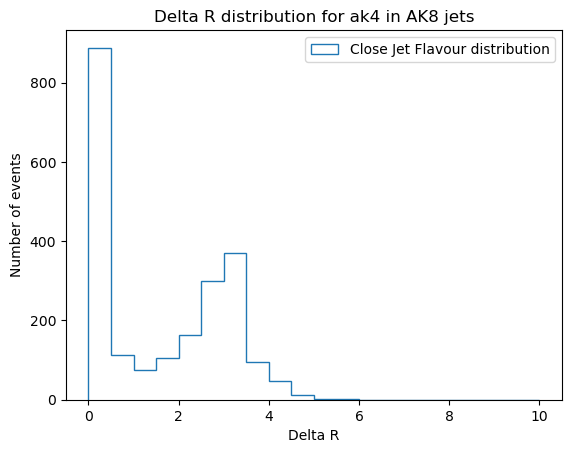

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()
genmother = events["GenPart_genPartIdxMother"].array()
topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

jet_pt = events["Jet_pt"].array()
jet_eta = events["Jet_eta"].array()
jet_phi = events["Jet_phi"].array()
jet_flovur = events["Jet_hadronFlavour"].array()
bmask = (gen_pdgid == 5)| (gen_pdgid == -5)  # b quark mask

# 1) 기본 마스크 ------------------------------------------------------------
b_mask      = (abs(gen_pdgid) == 5)          # b 혹은 anti-b
mother_pid  = gen_pdgid[genmother]           # b-쿼크의 엄마 PDG ID

top_mom_mask = (mother_pid ==  6) | (mother_pid == -6)
wr_mom_mask  = (mother_pid == 34) | (mother_pid == -34)

# 2) 두 조건을 합쳐 최종 b-쿼크 마스크 --------------------------------------
topmom_b_mask = b_mask & (top_mom_mask )
WRmom_b_mask = b_mask & (wr_mom_mask)

# 3) 이벤트 안에서의 인덱스 추출 -------------------------------------------
positions  = ak.local_index(gen_pdgid, axis=1)   # [[0,1,2,…], …]
topmom_b_indices  = positions[topmom_b_mask]          # events × N_b  형태
WRmom_b_indices  = positions[WRmom_b_mask]          # events × N_b  형태
print("b_indices: ", WRmom_b_indices)
print("topmom_b_indices: ", topmom_b_indices)




#deltar
dr_total = []
dr_tb_total = []
min_idx = []
second_min_idx = []
third_min_idx = []
survived_jet = 0 
cleand_jet = 0
closejetflavor = []
for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
        continue
    # fatjet
    top_etas = top_eta[i][1]
    top_phi = top_phi1[i][1]
    
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산

    
    dr_jet = np.sqrt(delta_eta**2 + delta_phi**2)
    if len(dr_jet) >1:
        idx = np.argsort(dr_jet)[0] #top AK8 jet index
        ## muon 중에 ak8 jet 과 R < 0.8 인 jet 갯수 찾기 
        ak8_eta = fatjet_eta[i][idx]
        ak8_phi = fatjet_phi[i][idx]

        b_eta = gen_eta[bmask]
        b_eta = b_eta[i]
        b_phi = gen_phi[bmask]
        b_phi = b_phi[i]

        b_deta = b_eta - ak8_eta
        b_dphi = b_phi - ak8_phi
        b_dphi = (b_dphi + np.pi) % (2 * np.pi) - np.pi
        b_dr = np.sqrt(b_deta**2 + b_dphi**2)
        dr_tb_total.append(b_dr)
        dr_tb_mask = b_dr < 0.8
        masked_pdgid = gen_pdgid[bmask]#b만 있는 pdgid
        masked_motheridx = genmother[bmask]#b 엄마의 인덱스 
        masked_mother_idx_less08 = masked_motheridx[i][dr_tb_mask]#i번째 이벤트에 거리가 0.8보다 작은 b 엄마 인덱스
        print(gen_pdgid[i][masked_mother_idx_less08])# i번쨰 이벤트의 엄마 인덱스를 통한 id
        # 엄마가 6 인 양수이면 b
        

        jet_deta = jet_eta[i] - ak8_eta
        jet_dphi = jet_phi[i] - ak8_phi
        jet_dphi = (jet_dphi + np.pi) % (2 * np.pi) - np.pi
        jet_dr = np.sqrt(jet_deta**2 + jet_dphi**2)
        dr_total.append(jet_dr)
        jet_mask = jet_dr < 0.8
        jet_dr = jet_dr[jet_mask]
        #print(jet_flovur[i][jet_mask])
        close_jet_flovur = jet_flovur[i][jet_mask]
        closejetflavor.append(close_jet_flovur)



dr_total = ak.flatten(dr_tb_total)

plt.hist(dr_total, bins=20, range=(0, 10), histtype='step', label='Close Jet Flavour distribution')
#plt.hist(closet_
#plt.hist(dr_total, bins=100, range=(0, 5), histtype='step', label='DR distribution')

plt.xlabel('Delta R')
plt.ylabel('Number of events')
plt.title('Delta R distribution for ak4 in AK8 jets')
plt.legend()

        









topmom_b_indices:  [[20], [15], [20], [18], [17], [12], ..., [19], [16], [14], [16, 19, 28], [18]]
b_indices:  [[17], [12], [17], [], [14], [], [12], ..., [9], [15], [13], [], [15], [15]]
[[-1, -1, 0, 2, 3, 3, 4, 4, 7, 7, ..., 84, 90, 91, 91, 92, 92, 93, 93, 88, 101]]


(array([92., 96., 42., 34., 28., 18., 16.,  8.,  7.,  3.,  6.,  3.,  6.,
         1.,  3.,  4.,  1.,  6.,  2.,  3.,  2.,  2.,  1.,  1.,  1.,  6.,
         0.,  1.,  3.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  1.,
         0.,  0.,  2.,  0.,  3.,  0.,  2.,  1.,  2.,  1.,  3.,  2.,  2.,
         1.,  2.,  2.,  4.,  3.,  3.,  7.,  3.,  3.,  3.,  8.,  1.,  7.,
         2.,  0.,  3.,  3.,  1.,  2.,  1.,  1.,  1.,  1.,  0.,  1.,  2.,
         0.,  0.,  1.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
        2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
        2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.

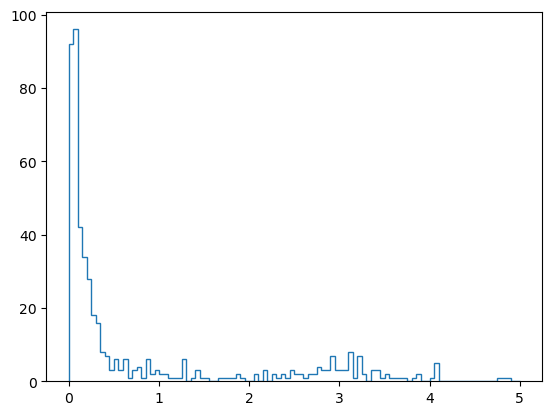

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()
genstatus = events["GenPart_statusFlags"].array()
genmother = events["GenPart_genPartIdxMother"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

muon_pt = events["Jet_pt"].array()
muon_eta = events["Jet_eta"].array()
muon_phi = events["Jet_phi"].array()


# 1) 기본 마스크 ------------------------------------------------------------
b_mask      = (abs(gen_pdgid) == 5)          # b 혹은 anti-b
mother_pid  = gen_pdgid[genmother]           # b-쿼크의 엄마 PDG ID

top_mom_mask = (mother_pid ==  6) | (mother_pid == -6)
wr_mom_mask  = (mother_pid == 34) | (mother_pid == -34)

# 2) 두 조건을 합쳐 최종 b-쿼크 마스크 --------------------------------------
topmom_b_mask = b_mask & (top_mom_mask )
WRmom_b_mask = b_mask & (wr_mom_mask)

# 3) 이벤트 안에서의 인덱스 추출 -------------------------------------------
positions  = ak.local_index(gen_pdgid, axis=1)   # [[0,1,2,…], …]
topmom_b_indices  = positions[topmom_b_mask]          # events × N_b  형태
WRmom_b_indices  = positions[WRmom_b_mask]          # events × N_b  형태
print("topmom_b_indices: ", topmom_b_indices)
print("b_indices: ", WRmom_b_indices)
print([topmom_b_indices[0]])
# 필요하다면 순수 Python 리스트로
b_indices_list = ak.to_list(b_indices)
drdr =[]
for i in range(len(top_eta)):
    deta = top_eta[i][0]-gen_eta[i][WRmom_b_indices[0]]
    dphi = top_phi1[i][0] -gen_phi[i][WRmom_b_indices[0]]
    dphi = (dphi + np.pi) % (2 * np.pi) - np.pi
    dr = np.sqrt(deta**2 + dphi**2)
    #print(dr)
    drdr.append(dr)
drdr = ak.flatten(drdr)
plt.hist(drdr, bins=100, range=(0, 5), histtype='step', label='DR distribution')




